#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 6
#### Topics:
- Multiple Regression
- Model/Variable Selection

#### Due: 07/06/2022 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>


**Name**: 

**Student ID**:

**Date**:

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

## Problem 1 (Multiple Regression)

Use the house prices dataset from class. Load it using the function ``load_house_prices_data``. We will use ``LogSalePrice`` as the targert variable (note that this is a transformed version of the original sale prince)

1. Use all varaibles in the data reteruned by ``load_house_prices_data``. Find at least one pair of competing predictors.
2. A constuction company is trying to figure out how to design a new development for maximal profit. They propose that since ``SecondFlrSF`` (second floor square footage, proportional to second floor square meter) is correlated with ``SalePrice``, they should try and maximize second floor area in their designs. Does this conclusion make sense considering that ``SecondFlrSF`` is correlated with``TotRmsAbvGrd``? offer a procedure that checks the effect of ``SecondFlrSF`` on ``SalePrice`` and gives more information to make such decision.


In [529]:
def load_house_prices_data(path = "housing_prices.csv"):
    """
    Args:
    -----
    path:  path to csv file
    
    Load and clean house prices data:
        filters for numeric predictors only
        filters for small lots only
        renames varaibles so that all variable names begins with [a-z]
        applies a variance stabilizing transformation to SalePrice
        removes outliers
        
    """
    
    
    def detect_outliers(df, q=0.01):
        lower_outliers = df < df.quantile(q)
        upper_outliers = df > df.quantile(1-q)
        return lower_outliers | upper_outliers
    
    data_raw = pd.read_csv(path)
    data1 = data_raw[data_raw.LotArea < 15000]  # focus on small lots
    data1 = data1.select_dtypes('number').dropna()
    data1 = data1.rename( # stats model formula cannot have
        # covaraite names starting with non letter
        columns = {'1stFlrSF': 'FirstFlrSF',
                   '2ndFlrSF': 'SecondFlrSF'}) 
                                                              
    variables =[
        'LogSalePrice',
        'LotArea', 
        'YearBuilt',
         'YrSold', 'MoSold', 
         'Fireplaces', 
        'GarageCars', 'ScreenPorch', 
         'HalfBath', 'FullBath',
         'GrLivArea', 
         'BedroomAbvGr',
        'FirstFlrSF', 
        'SecondFlrSF',
        'TotRmsAbvGrd',
        'LowQualFinSF', 'TotalBsmtSF',
        'LotFrontage', 'WoodDeckSF',
         'OverallQual',
         'OverallCond'
    ]

    data1 = data1.filter(variables).dropna()
    data1['LogSalePrice'] = np.log(1 + data1['SalePrice'])
    data1 = data1.drop('SalePrice', axis=1)
    
    mask = detect_outliers(data1, .01).any(1)
    print(f"Masked a fraction of {mask.mean()} of the data due to outliers")
    return data1[~mask]


## Problem 2 (Variable Selection)

Use the house prices dataset from class. Load it using the function ``load_house_prices_data``. 

1. Write the function ``backward_select`` (prototype below). Apply it on the house prices dataset and report the resulting model. 
2. Write a function that receives as an input a set of predictors and the response and evaluates the leave-one-out accuracy (n-fold cross validation). What is the CV-error of the model you found in 1 ?
3. Consider the predictors ``OverallCond``, ``YearBuilt``, ``LotArea``, ``Fireplaces``. Go over all $2^4$ models. Evaluate $R^2$, AIC, BIC, and leave-one-out CV-error for every model and print the results. Report on the model with lowest AIC, BIC, CV-error. 

Hint: for 1, modify the ``forward_select`` function from class.

In [301]:
def backward_select(data, response, sig_level=.05):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data: pandas DataFrame with all possible predictors and response

    response: string, name of response column in data
    
    sig_level:  significance level for F-test

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept selected by backward selection
           evaluated by R-squared and F-test for extra sum of squares
    """
    # Your code goes here
    pass


## Problem 3 (Selecting Order of Regression using Cross-Validation)

Consider the dataset ``AnneFrank.csv``, describing the number of searches of the term "Anne Frank" by hour over several days in February 2022. The cell below contains code you should use to arrange the data by hours. 

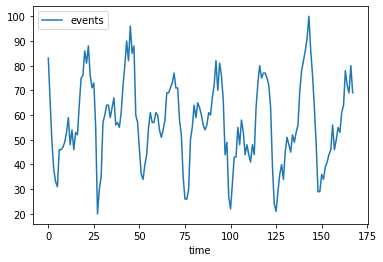

In [518]:
AnneFrank = pd.read_csv("AnneFrank.csv", header=1, names=['time', 'events'])
AnneFrank['date'] = pd.to_datetime(AnneFrank.time)
AnneFrank['time'] = AnneFrank['date'].astype(int) / 3600000000000
AnneFrank['time'] = AnneFrank['time'] - AnneFrank['time'].min()
AnneFrank.plot(x='time', y='events'); plt.show()

In this question you will fit a model to the response based on $2p+1$ predictors of the form:
$$
\begin{align}
x_1 = [1,~\ldots~,1]
\end{align}
$$
$$
\begin{align}
x_{2k} & = \sin(2 \pi \cdot k \cdot t / 60) \\
x_{2k+1} & = \cos(2 \pi \cdot k \cdot t / 60), \qquad k=1,\ldots,p.
\end{align}
$$
(these are sinusoids of increaasing frequency at a resolution of 1min) You will then use the selected model to predict the number of events in future times. 

1. Write a function ``generate_Z`` that recieves as inputs a vector of time indices (representing hours) ``t`` and ``p``. The function returns the design matrix $Z$ of size $n \times (2p+1)$, where $n$ is the length of ``t``.
2. For each $p=1,\ldots,20$, fit a linear model to ``events`` based on $Z$ you obtain from ``generate_Z`` and evalaute its leave-one-out CV error. Plot the CV error versus $p$. 
3. Report on the model with the lowest CV error; plot its response over time along with the original response in the figure above. 
4. Using the model you found in 3, predict the number of event at times $t=168.\ldots,190$. Plot your prediction over time in the same figure as above, i.e., interpolate the response curve to future value. 
5. For each $t$ in 4, construct a 0.95 confidence interval of your prediction of $y_t$, $t=168,\ldots,190$. Plot the upper and lower limits of this interval over time (these lines define a prediction band). Here, you may ignore the danger of inference based on the t distribution after applying a model selection procedure. 

Hints: (2) In order to evalaute the CV error, you'll need the hat matrix (which you can get directly from Z) and the residuals in the LS fit (which you can get from the ``resid`` property of the fitted model object returned by ``statsmodels.api.OLS.fit``). (4) you can use the function ``predict`` of the fitted model object by passing new predictors that you generate using ``generate_Z``. For (5), $s^2$ is given by the property ``mse_resid`` (or ``ssr`` divided by the number of degrees of freedom). Also note that the number of degrees of freedom is $2p+1$ where $p$ is the number you found in 3. 

In [482]:
def generate_Z(t, p):
    """
    Args:
    ----
    t:   vector of time samples (length n)
    p:   number of frequencies (overal 2p+1 predictors)
    
    Returns:
    --------
    Z:  design matrix of size (n, 2p+1)
    """
    
    # Your code goes here
    
    pass